> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset chosen for this project is titled "TMDB Movie Data" - a cleaned dataset originally sourced from [link](https://kaggle.com) - and it is provided by the examiner via [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv). The dataset contains information about movies released between 1960 to 2015 from the The Movie database. The dataset contains 10866 rows and 21 columns. A short description of the columns found in the dataset is given below:

     1) id: this is unique number for each movie in the dataset

     2) imdb_id: this is unique id given to each movies by IMDB

     3) popularity: this is a numerical rating of the movies' popularity

     4) budget: this is amount spent to produce each movies as at the time of production

     5) revenue: this is the income made from the movies

     6) original_title: this is the unique title of the each movie

     7) cast: this is a preview of major actors for each movie.

     8) homepage: this is the website where more informations about each movie can be gotten

     9) director: this is the list of the directors for each movie

     10) tagline: this is the list of catchy phrases that can be associated with each movie

     11) keywords: this is a list of keywords you can use to search for the movie on an SEO engine

     12) overview: this is the list of short description about the each movies. it is otherwise known as synopsis

     13) runtime: this is the list of the number of mins or hours each movie plays for i.e number of hours or minutes it takes to complete each movie

     14) genre: this is the list of the genre or genres associated with each movie

     15) production_companies: this is the list of the company that produced each movie

     16) release_date: this is the list of the date each movie was released to the public for viewing

     17) vote_count: this is the list of counts of the number of people who rated the movie on IMDB

     18) vote_average: this is the list of average rating of each movies

     19) release_year: this is the list of the year each movie was released for public viewership

     20) budget_adj: this is the inflation adjusted budget for each movie to show us the time value of the money spent as at the time of production i.e. what the money spent in let's say 1996, will worth in 2022

     21) revenue_adj: this is the inflaation adjuested income for each movie showing us the worth of the income realized in our time


### Question(s) for Analysis

The questions for analysis are divided into two groups -the first group is top ten movies and the second group is top release years.


> Group 1 Questions:

      1) In terms of actual value, what are the top 10 movies with the highest production budget?

      2) In terms of inflation adjusted vlaue, what are the top 10 movies with highest production budget?

      3) In terms of actual value, what are the top 10 highest gross earning movies?

      4) In terms of inflation adjusted value, what are the top 10 highest gross earning movies?

      5) In terms of actual value, what are the top 10 most profitable movies?

      6) In terms of inflation adjusted value, what are the top 10 most profitable movies?

      7) What are the top 10 most popular movies in the dataset?


> Group 2 Questions:

      1) In terms of actual value, what release year witnessed the movies released with the highest profit?
    
      2) In terms of inflation adjusted value, what release year witnessed the movies released with the highest profit?
    
      3) In terms of actual value, what release year witnessed the movies released with the highest producction budget?
    
      4) In terms of inflation adjusted value, what release year witnessed the movies released with the highest producction budget?
    
     5) In terms of actual value, what release year witnessed the movies released with the highest revenue?
    
     6) In terms of inflation adjusted value, what release year witnessed the movies released with the highest revenue?
    
     7) What released year were the most movie released?

# IMPORTING ALL THE PACKAGES NEEDED FOR ANALYSIS

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
% matplotlib inline

> ***Observation: Numpy, Pandas, Matplotlib.pyplot,seaborn and re were succesfully imported***

In [3]:
! pip install --upgrade pandas 0.25.0

    100% |████████████████████████████████| 9.5MB 3.8MB/s eta 0:00:01    74% |███████████████████████▉        | 7.1MB 28.5MB/s eta 0:00:01
  Could not find a version that satisfies the requirement 1.4.1 (from versions: )
No matching distribution found for 1.4.1


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

## IMPORTING THE DATASET TO BE ANALYSED

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv', sep = ',')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> ***Observation: Dataset was succesfully imported and the head function was used to preview the data***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> ***Observation: df.info() ran successfully and showed us the properties of each column specifying the total non-null rows in each columns and their data types too***

In [4]:
df.shape

(10866, 21)

> ***Observation: df.shape ran succesfully returning the numberof rows of the dataset as 10866 and number of columns of the dataset as 21***

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> ***Observation: df.dtypes ran succesfully returning the various dtype of each column. As we can observe, some columns are object, some are int64 and others are float64***


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

## Cleaning my dataset

In [6]:
# The first data to be cleaned are the set of data in the release_date column
#  Here, we are coverting the format of the date to datetime

df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format = True)

> ***Observation: pd.to_datetime ran succesfully and change has been made***

In [7]:
# Here, we are converting the data in the budget_adj column from float64 to int64
# This is to present the data in the actual figures rather than scientific notation

df['budget_adj'] = df['budget_adj'].values.astype(np.int64)

> ***Observation:the conversion from float64 to int64 ran succesfully and the change has been effected***

In [8]:
# Here, we are also converting the daa in the revenue_adj column from float64 to int64

df['revenue_adj'] = df['revenue_adj'].values.astype(np.int64)

> ***Observation:the conversion from float64 to int64 ran succesfully and the change has been effected***

In [9]:
# Here, we are confirming that the change has been effected using the df.types function

df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

> ***Observation:tdf.types showed us that the chnage has been effected***

In [10]:
# Here, we are dropping three columns - 'id', 'homepage' and 'vote_average' that I believe is not needed

df.drop(['id', 'homepage', 'vote_average'], axis = 1, inplace = True)
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,137999939,1392445892
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,137999939,348161292
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,101199955,271619025
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,183999919,1902723129
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,174799923,1385748801


> ***Observation:the the affected columns were succesfully dropped***

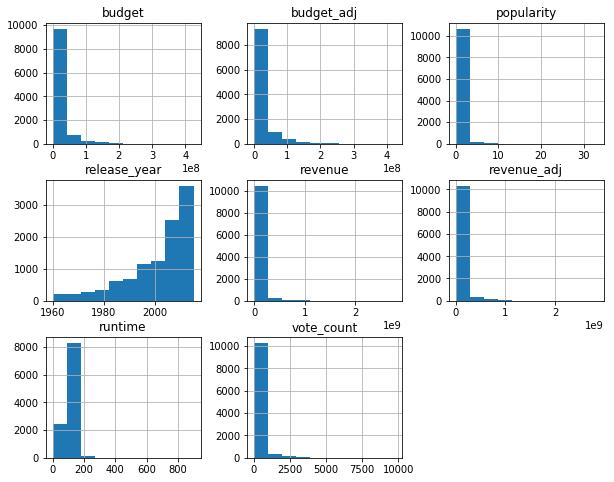

In [11]:
# Checking the data using a histogram
df.hist(figsize=(10,8));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f272c3e3d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f272bda19e8>]], dtype=object)

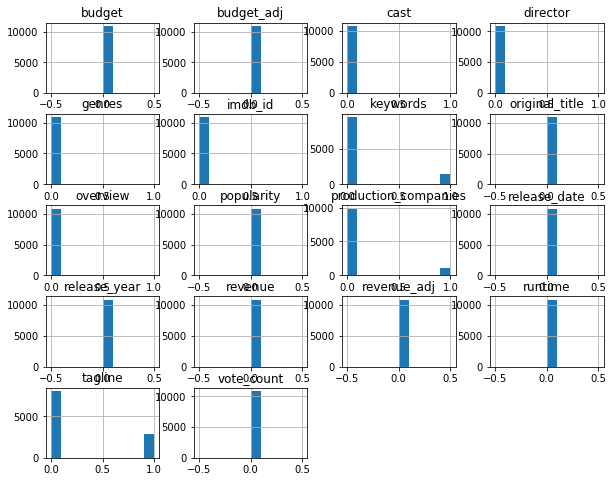

In [12]:
# Checking the null columns using a histogram
df.isnull().hist(figsize=(10,8))

In [12]:
# Checking the percentage and actual umber of null columns
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f'{column} - {round((null_count/df.shape[0]) * 100)}% MISSING and total missing is: {null_count}')

imdb_id - 0.0% MISSING and total missing is: 10
popularity - 0.0% MISSING and total missing is: 0
budget - 0.0% MISSING and total missing is: 0
revenue - 0.0% MISSING and total missing is: 0
original_title - 0.0% MISSING and total missing is: 0
cast - 1.0% MISSING and total missing is: 76
director - 0.0% MISSING and total missing is: 44
tagline - 26.0% MISSING and total missing is: 2824
keywords - 14.0% MISSING and total missing is: 1493
overview - 0.0% MISSING and total missing is: 4
runtime - 0.0% MISSING and total missing is: 0
genres - 0.0% MISSING and total missing is: 23
production_companies - 9.0% MISSING and total missing is: 1030
release_date - 0.0% MISSING and total missing is: 0
vote_count - 0.0% MISSING and total missing is: 0
release_year - 0.0% MISSING and total missing is: 0
budget_adj - 0.0% MISSING and total missing is: 0
revenue_adj - 0.0% MISSING and total missing is: 0


> ***Observation: it can be seen that tagline, keywords, production_companies and cast had significant number of null values while imdb_id and genres had insignificant number of null values. other volumns had no null value***

# Filling the null columns needed and dropping the unneeded columns

In [13]:
# the movies with null value in the tagline columns were filled up

df.tagline.fillna('NO TAGLINE', inplace=True)

In [14]:
# the movies with null value in the keyword columns were filled up

df.keywords.fillna('NO KEYWORD', inplace=True)

In [15]:
# the movies with null value in the cast were filled up 

df.cast.fillna('CAST NOT PROVIDED', inplace=True)

In [16]:
# the movies with null value in the production_companies column were filled up

df.production_companies.fillna('NO PRODUCTION COMPANY DETAILS', inplace=True)

In [17]:
# The rows with insignificant null were dropped

df.dropna(axis=0, inplace=True)

In [18]:
# Checking for zeroes in the columns
for column in df.columns:
    zero_count = (df[column] == 0).sum()
    print(f'{column} - {round((zero_count/df.shape[0]) * 100)}% ZERO and total zeroes is: {zero_count}')

imdb_id - 0.0% ZERO and total zeroes is: 0
popularity - 0.0% ZERO and total zeroes is: 0
budget - 52.0% ZERO and total zeroes is: 5630
revenue - 55.0% ZERO and total zeroes is: 5945
original_title - 0.0% ZERO and total zeroes is: 0
cast - 0.0% ZERO and total zeroes is: 0
director - 0.0% ZERO and total zeroes is: 0
tagline - 0.0% ZERO and total zeroes is: 0
keywords - 0.0% ZERO and total zeroes is: 0
overview - 0.0% ZERO and total zeroes is: 0
runtime - 0.0% ZERO and total zeroes is: 27
genres - 0.0% ZERO and total zeroes is: 0
production_companies - 0.0% ZERO and total zeroes is: 0
release_date - 0.0% ZERO and total zeroes is: 0
vote_count - 0.0% ZERO and total zeroes is: 0
release_year - 0.0% ZERO and total zeroes is: 0
budget_adj - 52.0% ZERO and total zeroes is: 5632
revenue_adj - 55.0% ZERO and total zeroes is: 5945


In [19]:
# Defining a function to replace the zeroes in each column with the mean of each column
def zero_rep(cols):
    for col in cols:
         df[col]=df[col].mask(df[col]==0).fillna(df[col].mean());
zero_rep(['budget','revenue','runtime','budget_adj','revenue_adj'])

> ***Observation: function run successfully and all zeroes have been replaced by their mean***

In [20]:
# Checking for zeroes in the columns to confirm the zeroes were replaced
for column in df.columns:
    zero_count = (df[column] == 0).sum()
    print(f'{column} - {round((zero_count/df.shape[0]) * 100)}% ZERO and total zeroes is: {zero_count}')

imdb_id - 0.0% ZERO and total zeroes is: 0
popularity - 0.0% ZERO and total zeroes is: 0
budget - 0.0% ZERO and total zeroes is: 0
revenue - 0.0% ZERO and total zeroes is: 0
original_title - 0.0% ZERO and total zeroes is: 0
cast - 0.0% ZERO and total zeroes is: 0
director - 0.0% ZERO and total zeroes is: 0
tagline - 0.0% ZERO and total zeroes is: 0
keywords - 0.0% ZERO and total zeroes is: 0
overview - 0.0% ZERO and total zeroes is: 0
runtime - 0.0% ZERO and total zeroes is: 0
genres - 0.0% ZERO and total zeroes is: 0
production_companies - 0.0% ZERO and total zeroes is: 0
release_date - 0.0% ZERO and total zeroes is: 0
vote_count - 0.0% ZERO and total zeroes is: 0
release_year - 0.0% ZERO and total zeroes is: 0
budget_adj - 0.0% ZERO and total zeroes is: 0
revenue_adj - 0.0% ZERO and total zeroes is: 0


In [21]:
# Creating the profit column
df['profit'] = df['revenue'] - df['budget']

In [22]:
# Creating the inflation adjusted profit
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

In [23]:
# coverting the dtype of the newly created profit_adj column from float64 to int64

df['profit_adj'] = df['profit_adj'].values.astype(np.int64)

In [24]:
# checking for missing values

df.isna().sum()

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
profit_adj              0
dtype: int64

> ***Observation:it can be observed that there is no column with missing values again***

### GROUP 1 QUESTIONS

> In this category, our questions to be answered are:

> 1) In terms of actual value, what are the top 10 movies with the highest production budget?

> 2) In terms of inflation adjusted vlaue, what are the top 10 movies with the highest production budget?

> 3) In terms of actual value, what are the top 10 highest gross earning movies?

> 4) In terms of inflation adjusted value, what are the top 10 highest gross earning movies?

> 5) In terms of actual value, what are the top 10 most profitable movies?

> 6) In terms of inflation adjusted value, what are the top 10 most profitable movies?

> 7) What are the top 10 most popular movies in the dataset?


In [25]:
# Creating two new tables seperating the columns into category and numerals 

category_cols = df.select_dtypes(exclude=[np.number])
numeric_cols = df.select_dtypes(include=[np.number])

In [26]:
category_cols.head()

,imdb_id,original_title,cast,director,tagline,keywords,overview,genres,production_companies,release_date
0,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09
1,tt1392190,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13
2,tt2908446,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18
3,tt2488496,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15
4,tt2820852,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01


> ***Observation:It can be observed from the above function that the new table was succesfully created and it contained only the category excluding all figures***

In [27]:
numeric_cols.head()

,popularity,budget,revenue,runtime,vote_count,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.985763,150000000.0,1.513529e+09,124.0,5562,2015,137999939.0,1.392446e+09,1.363529e+09,1254445953
1,28.419936,150000000.0,3.784364e+08,120.0,6185,2015,137999939.0,3.481613e+08,2.284364e+08,210161353
2,13.112507,110000000.0,2.952382e+08,119.0,2480,2015,101199955.0,2.716190e+08,1.852382e+08,170419070
3,11.173104,200000000.0,2.068178e+09,136.0,5292,2015,183999919.0,1.902723e+09,1.868178e+09,1718723210
4,9.335014,190000000.0,1.506249e+09,137.0,2947,2015,174799923.0,1.385749e+09,1.316249e+09,1210948878


> ***Observation:It can be observed that the numeric table was succesfully created and it excluded all categories***

In [28]:
# checking the column names for easy access in subsequent functions calling

df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'release_year',
       'budget_adj', 'revenue_adj', 'profit', 'profit_adj'],
      dtype='object')

In [29]:
# Selecting the needed and informative columns

cols_required = ['original_title', 'release_year', 'runtime', 'popularity', 'budget', 'revenue', 'budget_adj', 'revenue_adj','profit','profit_adj']

In [30]:
# In terms of actual value, what are the top 10 movies with the highest production budget?

df.loc[df.budget.sort_values(ascending=False).head(10).index, cols_required]

,original_title,release_year,runtime,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit_adj
2244,The Warrior's Way,2010,100.0,0.250540,425000000.0,1.108757e+07,425000000.0,1.108757e+07,-4.139124e+08,-413912431
3375,Pirates of the Caribbean: On Stranger Tides,2011,136.0,4.955130,380000000.0,1.021683e+09,368371256.0,9.904175e+08,6.416830e+08,622046244
7387,Pirates of the Caribbean: At World's End,2007,169.0,4.965391,300000000.0,9.610000e+08,315500574.0,1.010654e+09,6.610000e+08,695152933
14,Avengers: Age of Ultron,2015,141.0,5.944927,280000000.0,1.405036e+09,257599886.0,1.292632e+09,1.125036e+09,1035032450
6570,Superman Returns,2006,154.0,1.957331,270000000.0,3.910812e+08,292050672.0,4.230205e+08,1.210812e+08,130969791
1929,Tangled,2010,100.0,2.865684,260000000.0,5.917949e+08,260000000.0,5.917949e+08,3.317949e+08,331794936
4411,John Carter,2012,132.0,1.588457,260000000.0,2.841391e+08,246933513.0,2.698595e+08,2.413910e+07,22925972
7394,Spider-Man 3,2007,139.0,2.520912,258000000.0,8.908716e+08,271330494.0,9.369017e+08,6.328716e+08,665571206
5508,The Lone Ranger,2013,149.0,1.214510,255000000.0,8.928991e+07,238688504.0,8.357833e+07,-1.657101e+08,-155110171
1389,Harry Potter and the Half-Blood Prince,2009,153.0,5.076472,250000000.0,9.339592e+08,254100108.0,9.492765e+08,6.839592e+08,695176425


> ***Observations: The movies above can be seen to be the top 10 movies with the highest production budget*** 

In [32]:
# In terms of inflation adjusted value, what are the top 10 movies with the highest production budget?

df.loc[df.budget_adj.sort_values(ascending=False).head(10).index,cols_required]

,original_title,release_year,runtime,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit_adj
2244,The Warrior's Way,2010,100.0,0.250540,425000000.0,1.108757e+07,425000000.0,1.108757e+07,-4.139124e+08,-413912431
3375,Pirates of the Caribbean: On Stranger Tides,2011,136.0,4.955130,380000000.0,1.021683e+09,368371256.0,9.904175e+08,6.416830e+08,622046244
7387,Pirates of the Caribbean: At World's End,2007,169.0,4.965391,300000000.0,9.610000e+08,315500574.0,1.010654e+09,6.610000e+08,695152933
6570,Superman Returns,2006,154.0,1.957331,270000000.0,3.910812e+08,292050672.0,4.230205e+08,1.210812e+08,130969791
5231,Titanic,1997,194.0,4.355219,200000000.0,1.845034e+09,271692064.0,2.506406e+09,1.645034e+09,2234713671
7394,Spider-Man 3,2007,139.0,2.520912,258000000.0,8.908716e+08,271330494.0,9.369017e+08,6.328716e+08,665571206
1929,Tangled,2010,100.0,2.865684,260000000.0,5.917949e+08,260000000.0,5.917949e+08,3.317949e+08,331794936
14,Avengers: Age of Ultron,2015,141.0,5.944927,280000000.0,1.405036e+09,257599886.0,1.292632e+09,1.125036e+09,1035032450
1389,Harry Potter and the Half-Blood Prince,2009,153.0,5.076472,250000000.0,9.339592e+08,254100108.0,9.492765e+08,6.839592e+08,695176425
8089,Waterworld,1995,135.0,1.232098,175000000.0,2.642182e+08,250419201.0,3.780875e+08,8.921822e+07,127668317


> ***Observation: it can be seen that when considering inflation adjusted budget, the top 10 movies was diffferent from the top 10 movies we observed when considering the actual value of the budget***

> ***Movies like "Waterworld" and "Titanic" displaced "John Carter" and "The Lone Ranger" seen in the previous result***

> ***From the result, we can see the effect on inflation of the budget values***

In [33]:
# In terms of actual value, what are the top 10 highest gross earning movies?

df.loc[df.revenue.sort_values(ascending=False).head(10).index, cols_required]

,original_title,release_year,runtime,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit_adj
1386,Avatar,2009,162.0,9.432768,237000000.0,2.781506e+09,240886902.0,2.827124e+09,2.544506e+09,2586236848
3,Star Wars: The Force Awakens,2015,136.0,11.173104,200000000.0,2.068178e+09,183999919.0,1.902723e+09,1.868178e+09,1718723210
5231,Titanic,1997,194.0,4.355219,200000000.0,1.845034e+09,271692064.0,2.506406e+09,1.645034e+09,2234713671
4361,The Avengers,2012,143.0,7.637767,220000000.0,1.519558e+09,208943741.0,1.443191e+09,1.299558e+09,1234247694
0,Jurassic World,2015,124.0,32.985763,150000000.0,1.513529e+09,137999939.0,1.392446e+09,1.363529e+09,1254445953
4,Furious 7,2015,137.0,9.335014,190000000.0,1.506249e+09,174799923.0,1.385749e+09,1.316249e+09,1210948878
14,Avengers: Age of Ultron,2015,141.0,5.944927,280000000.0,1.405036e+09,257599886.0,1.292632e+09,1.125036e+09,1035032450
3374,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,5.711315,125000000.0,1.327818e+09,121174755.0,1.287184e+09,1.202818e+09,1166009242
5422,Frozen,2013,102.0,6.112766,150000000.0,1.274219e+09,140405002.0,1.192711e+09,1.124219e+09,1052306489
5425,Iron Man 3,2013,130.0,4.946136,200000000.0,1.215440e+09,187206670.0,1.137692e+09,1.015440e+09,950485702


> ***Observations: The movies above can be seen to be the top 10 movies with the highest gross earnings or revenue when inflation adjustment is not considered*** 

In [34]:
# In terms of inflation adjusted value, what are the top 10 highest gross earning movies?

df.loc[df.revenue_adj.sort_values(ascending=False).head(10).index, cols_required]

,original_title,release_year,runtime,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit_adj
1386,Avatar,2009,162.0,9.432768,237000000.0,2.781506e+09,240886902.0,2.827124e+09,2.544506e+09,2586236848
1329,Star Wars,1977,121.0,12.037933,11000000.0,7.753980e+08,39575591.0,2.789712e+09,7.643980e+08,2750136651
5231,Titanic,1997,194.0,4.355219,200000000.0,1.845034e+09,271692064.0,2.506406e+09,1.645034e+09,2234713671
10594,The Exorcist,1973,122.0,2.010733,8000000.0,4.413061e+08,39289276.0,2.167325e+09,4.333061e+08,2128035625
9806,Jaws,1975,124.0,2.563191,7000000.0,4.706540e+08,28362748.0,1.907006e+09,4.636540e+08,1878643093
3,Star Wars: The Force Awakens,2015,136.0,11.173104,200000000.0,2.068178e+09,183999919.0,1.902723e+09,1.868178e+09,1718723210
8889,E.T. the Extra-Terrestrial,1982,115.0,2.900556,10500000.0,7.929106e+08,23726245.0,1.791694e+09,7.824106e+08,1767968064
8094,The Net,1995,114.0,1.136610,22000000.0,1.106280e+09,31481271.0,1.583050e+09,1.084280e+09,1551568265
10110,One Hundred and One Dalmatians,1961,79.0,2.631987,4000000.0,2.158800e+08,29179444.0,1.574815e+09,2.118800e+08,1545635295
4361,The Avengers,2012,143.0,7.637767,220000000.0,1.519558e+09,208943741.0,1.443191e+09,1.299558e+09,1234247694


> ***Observation: When considering inflation adjusted revenue, the difference between the inflated adjusted revenue and actual revenue is much prominent as it can be seen in the movies that appeared in top 10 in both categories ***

> ***Movies like "StarWar", "The Exorcist", "Jaws", "E.T - The Extra Terrestial", "The Net" and "One Hundred and One Dalmatians" displaced "Jurrassic World", "Furious 7", "Harry Porter and The Deadly Harrows: Part 2, "Frozen" and "Iron Man 3" seen in the previous result**

> ***From the result, we can see the huge effect on inflation of the budget values***

In [35]:
# In terms of actual value, what are the top 10 most profitable movies?

df.loc[df.profit.sort_values(ascending=False).head(10).index,cols_required]

,original_title,release_year,runtime,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit_adj
1386,Avatar,2009,162.0,9.432768,237000000.0,2.781506e+09,240886902.0,2.827124e+09,2.544506e+09,2586236848
3,Star Wars: The Force Awakens,2015,136.0,11.173104,200000000.0,2.068178e+09,183999919.0,1.902723e+09,1.868178e+09,1718723210
5231,Titanic,1997,194.0,4.355219,200000000.0,1.845034e+09,271692064.0,2.506406e+09,1.645034e+09,2234713671
0,Jurassic World,2015,124.0,32.985763,150000000.0,1.513529e+09,137999939.0,1.392446e+09,1.363529e+09,1254445953
4,Furious 7,2015,137.0,9.335014,190000000.0,1.506249e+09,174799923.0,1.385749e+09,1.316249e+09,1210948878
4361,The Avengers,2012,143.0,7.637767,220000000.0,1.519558e+09,208943741.0,1.443191e+09,1.299558e+09,1234247694
3374,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,5.711315,125000000.0,1.327818e+09,121174755.0,1.287184e+09,1.202818e+09,1166009242
14,Avengers: Age of Ultron,2015,141.0,5.944927,280000000.0,1.405036e+09,257599886.0,1.292632e+09,1.125036e+09,1035032450
5422,Frozen,2013,102.0,6.112766,150000000.0,1.274219e+09,140405002.0,1.192711e+09,1.124219e+09,1052306489
8094,The Net,1995,114.0,1.136610,22000000.0,1.106280e+09,31481271.0,1.583050e+09,1.084280e+09,1551568265


> ***Observations: The movies above can be seen to be the top 10 profitable movies when inflation adjustment is not considered*** 

> ***It can be seen that same movies that appeared in top revenue table when inflation adjustment is not considered are the same movies that appeared in top 10 profitable movies when inlfation adjustment is not considered except for "Iron Man 3" which was replaced by "The Net" which appeared on the top 10 movies with highest revenue when inflation adjustment is considered*** 

In [36]:
# In terms of inflation adjusted value, what are the top 10 most profitable movies?

df.loc[df.profit_adj.sort_values(ascending=False).head(10).index,cols_required]

,original_title,release_year,runtime,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit_adj
1329,Star Wars,1977,121.0,12.037933,11000000.0,7.753980e+08,39575591.0,2.789712e+09,7.643980e+08,2750136651
1386,Avatar,2009,162.0,9.432768,237000000.0,2.781506e+09,240886902.0,2.827124e+09,2.544506e+09,2586236848
5231,Titanic,1997,194.0,4.355219,200000000.0,1.845034e+09,271692064.0,2.506406e+09,1.645034e+09,2234713671
10594,The Exorcist,1973,122.0,2.010733,8000000.0,4.413061e+08,39289276.0,2.167325e+09,4.333061e+08,2128035625
9806,Jaws,1975,124.0,2.563191,7000000.0,4.706540e+08,28362748.0,1.907006e+09,4.636540e+08,1878643093
8889,E.T. the Extra-Terrestrial,1982,115.0,2.900556,10500000.0,7.929106e+08,23726245.0,1.791694e+09,7.824106e+08,1767968064
3,Star Wars: The Force Awakens,2015,136.0,11.173104,200000000.0,2.068178e+09,183999919.0,1.902723e+09,1.868178e+09,1718723210
8094,The Net,1995,114.0,1.136610,22000000.0,1.106280e+09,31481271.0,1.583050e+09,1.084280e+09,1551568265
10110,One Hundred and One Dalmatians,1961,79.0,2.631987,4000000.0,2.158800e+08,29179444.0,1.574815e+09,2.118800e+08,1545635295
7309,The Empire Strikes Back,1980,124.0,5.488441,18000000.0,5.384000e+08,47628661.0,1.424626e+09,5.204000e+08,1376997526


> ***Observations: The movies above can be seen to be the top 10 profitable movies when inflation adjustment is considered*** 

> ***It can be seen that same set of movies that appeared in top revenue table when inflation adjustment is considered are the same set of movies that appeared in top 10 profitable movies when inlfation adjustment is  considered except for "The Empire Strikes Back" which displaced by "The Avenger" which appeared on the top 10 movies with highest revenue when inflation adjustment is considered*** 

In [37]:
# What are the top 10 most popular movies in the dataset?
df.loc[df.popularity.sort_values(ascending=False).head(10).index,cols_required]

,original_title,release_year,runtime,popularity,budget,revenue,budget_adj,revenue_adj,profit,profit_adj
0,Jurassic World,2015,124.0,32.985763,150000000.0,1.513529e+09,137999939.0,1.392446e+09,1.363529e+09,1254445953
1,Mad Max: Fury Road,2015,120.0,28.419936,150000000.0,3.784364e+08,137999939.0,3.481613e+08,2.284364e+08,210161353
629,Interstellar,2014,169.0,24.949134,165000000.0,6.217525e+08,151980023.0,5.726906e+08,4.567525e+08,420710622
630,Guardians of the Galaxy,2014,121.0,14.311205,170000000.0,7.733124e+08,156585478.0,7.122911e+08,6.033124e+08,555705652
2,Insurgent,2015,119.0,13.112507,110000000.0,2.952382e+08,101199955.0,2.716190e+08,1.852382e+08,170419070
631,Captain America: The Winter Soldier,2014,136.0,12.971027,170000000.0,7.147666e+08,156585478.0,6.583651e+08,5.447666e+08,501779614
1329,Star Wars,1977,121.0,12.037933,11000000.0,7.753980e+08,39575591.0,2.789712e+09,7.643980e+08,2750136651
632,John Wick,2014,101.0,11.422751,20000000.0,7.873990e+07,18421821.0,7.252661e+07,5.873990e+07,54104793
3,Star Wars: The Force Awakens,2015,136.0,11.173104,200000000.0,2.068178e+09,183999919.0,1.902723e+09,1.868178e+09,1718723210
633,The Hunger Games: Mockingjay - Part 1,2014,123.0,10.739009,125000000.0,7.521002e+08,115136381.0,6.927528e+08,6.271002e+08,577616409


> ***Observations: The movies above can be seen to be the top 10 most popular movies. It can be observed that movies like "The Hunger Games: Mockingjay- Part 1", "John Wick", "Captain America: The Winter Soldier","Insurgent", "Guardian of the Galaxy", "Interstellar", "Mad Max: Fury Road" did not appear in top 10 movies with largest production budget nor top 10 highest grossing movies whether inflation adjustment is considered or not but they are pretty popular among viewers and fans as they emerged in the top 10 most popular movies.***

### Summary of the observations found in the questions answered

> ***1) It can be seen that inflation has a huge impact on the budget and revenue of a movie***

> ***2) It can also observed that neither production budget or revenue made from movies have impact on the popularity of the movie amongst fans and viewers***
    

### GROUP 2 QUESTIONS 

> ***The following question are to be answered in the series of analysis below:***

> 1) In terms of actual value, what release year witnessed the movies released with the highest profit considering the total profit?
    
> 2) In terms of inflation adjusted value, what release year witnessed the movies released with the highest profit considering the total profit?
    
> 3) In terms of actual value, what release year witnessed the movies released with the highest production budget considering the total budget?
    
> 4) In terms of inflation adjusted value, what release year witnessed the movies released with the highest production budget considering the total budget ?
    
> 5) In terms of actual value, what release year witnessed the movies released with the highest revenue considering the total revenue?

> 6) In terms of inflation adjusted value, what release year witnessed the movies released with the highest revenue considering the total revenue?

> 7) What released year were the most movie released?


***To start this analysis, we have to take a 1d analysis of the key parameters to be considered in our analysis. The key paramters include:***
        
        1. Budget
        
        2. Revenue
        
        3. Profit
        
        4. Inflation adjusted budget
        
        5. Inflation adjusted revenue
        
        6. Inflation adjusted revenue
        

In [54]:
#setting the bins interval
bins_pro_ad = np.arange(df.profit_adj.min(),df.profit_adj.max()+5*10**7,5*10**7);
bins_pro = np.arange(df.profit.min(),df.profit.max()+5*10**7,5*10**7);

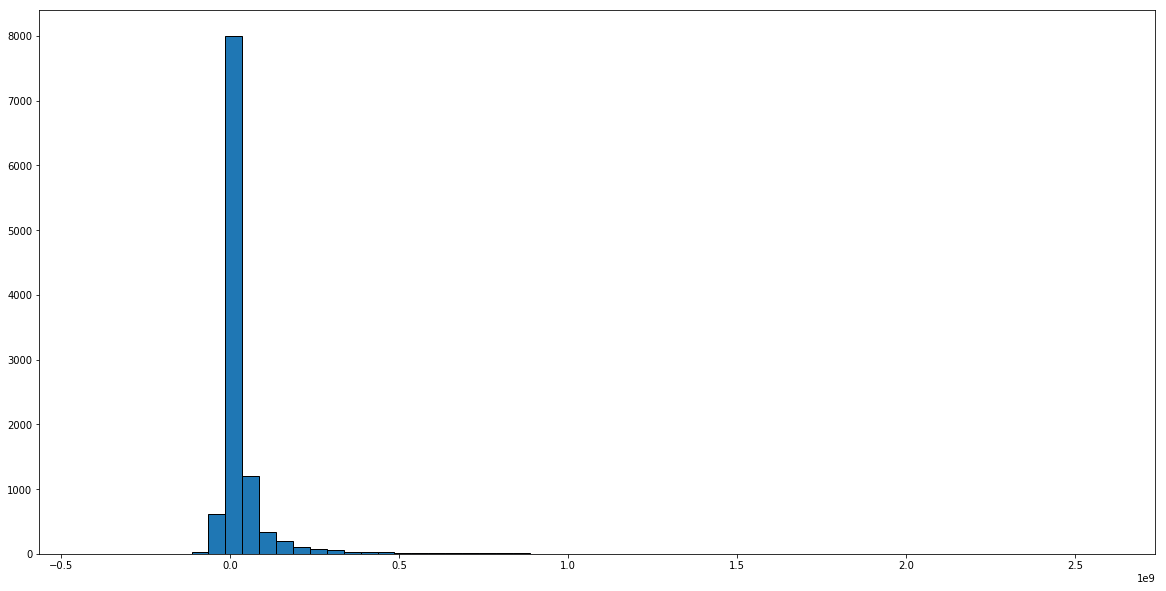

In [55]:
df.query('revenue>0 and budget>0')['profit'].hist(grid=False,bins=bins_pro,edgecolor='black',figsize=[20,10]);

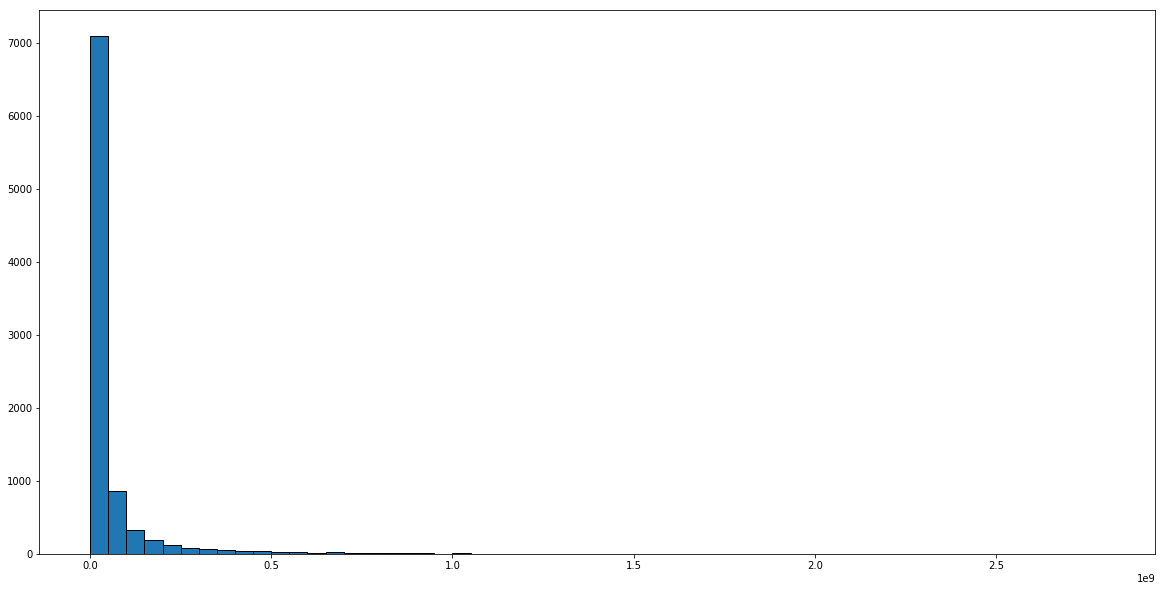

In [56]:
df.query('revenue_adj>0 and budget_adj>0')['profit_adj'].hist(grid=False,bins=bins_pro_ad,edgecolor='black',figsize=[20,10]);

In [40]:
# Defining a function to plot solutions to the questions asked 

# credits to the code goes to the reviewer of my first assignment

def myGrpPlot(df,grpVar,yVar,stat='sum',figsize=[30,10],color='blue'):
    
    # plot function
    
    df.groupby([grpVar])[yVar].agg(stat).plot.bar(edgecolor='black',figsize=figsize,rot=0,width=0.8,color=color);
    
    # tidy up labels after plottting
    
    grpVar=grpVar.replace("_"," ") #replace _ with space
    yVar=yVar.replace("_"," ") #replace _ with space
    
    # adding title to the plot
    
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    
    # adding x-label to the plot 
    
    plt.xlabel(grpVar.title(), fontsize = 10, weight = "bold")
    
    # adding y-label to the plot
    
    plt.ylabel(f'{stat} {yVar}'.title(), fontsize = 10, weight = "bold" )

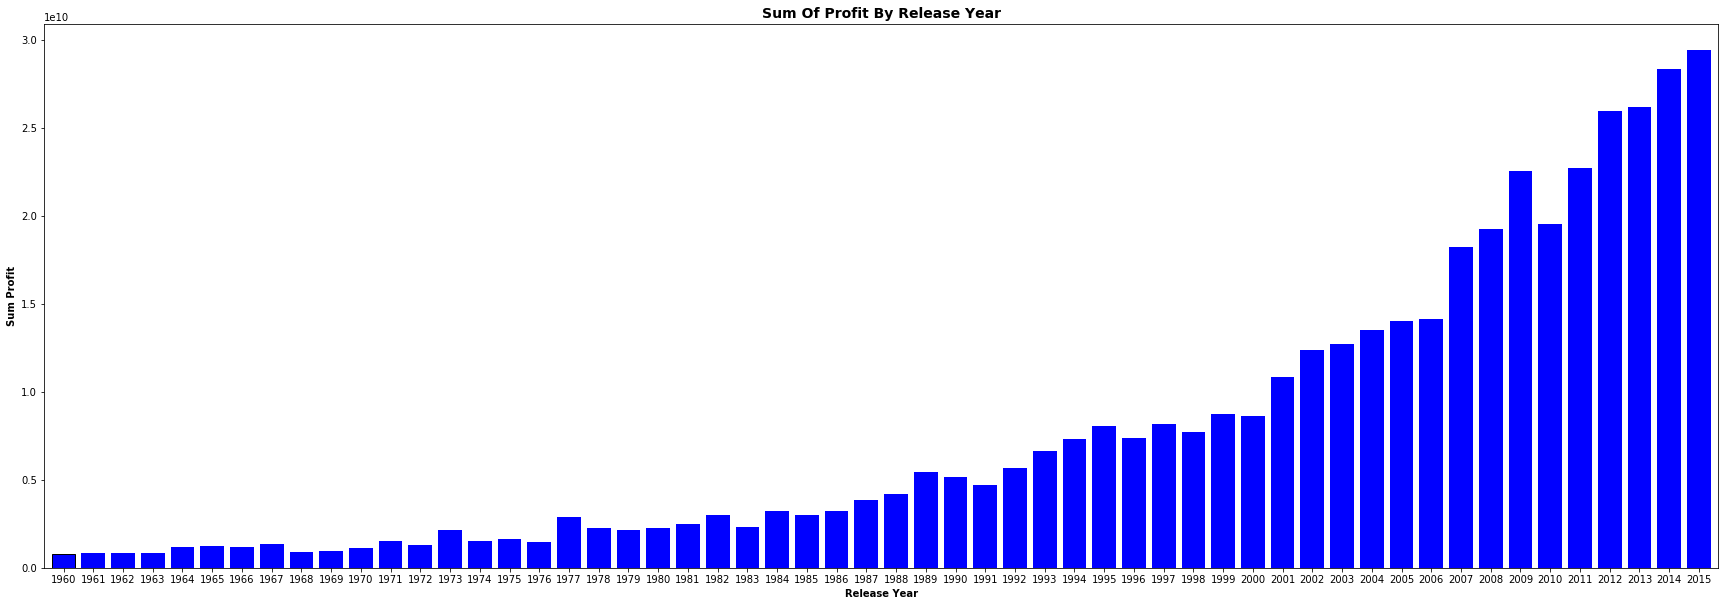

In [41]:
myGrpPlot(df, 'release_year', 'profit')

> ***Observation: From the graph above, it can be seen that 2015 witnessed movies with more profits when considering inflation adjustment is not considered***

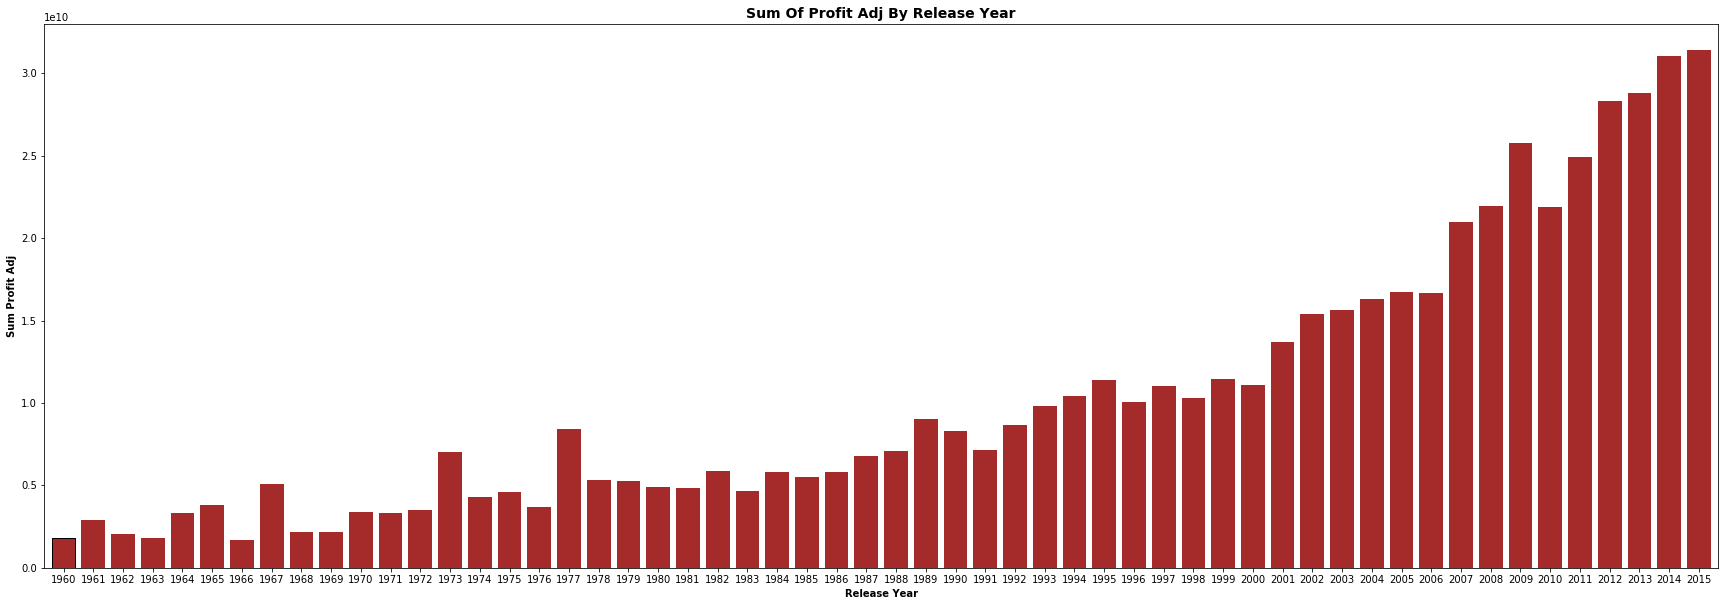

In [42]:
myGrpPlot(df, 'release_year', 'profit_adj', color='brown')

> ***Observations: From the graph, we can visually see the impact of inflation adjusted on the profit as lot of figure went up. However 2015 still witnessed the most profit***

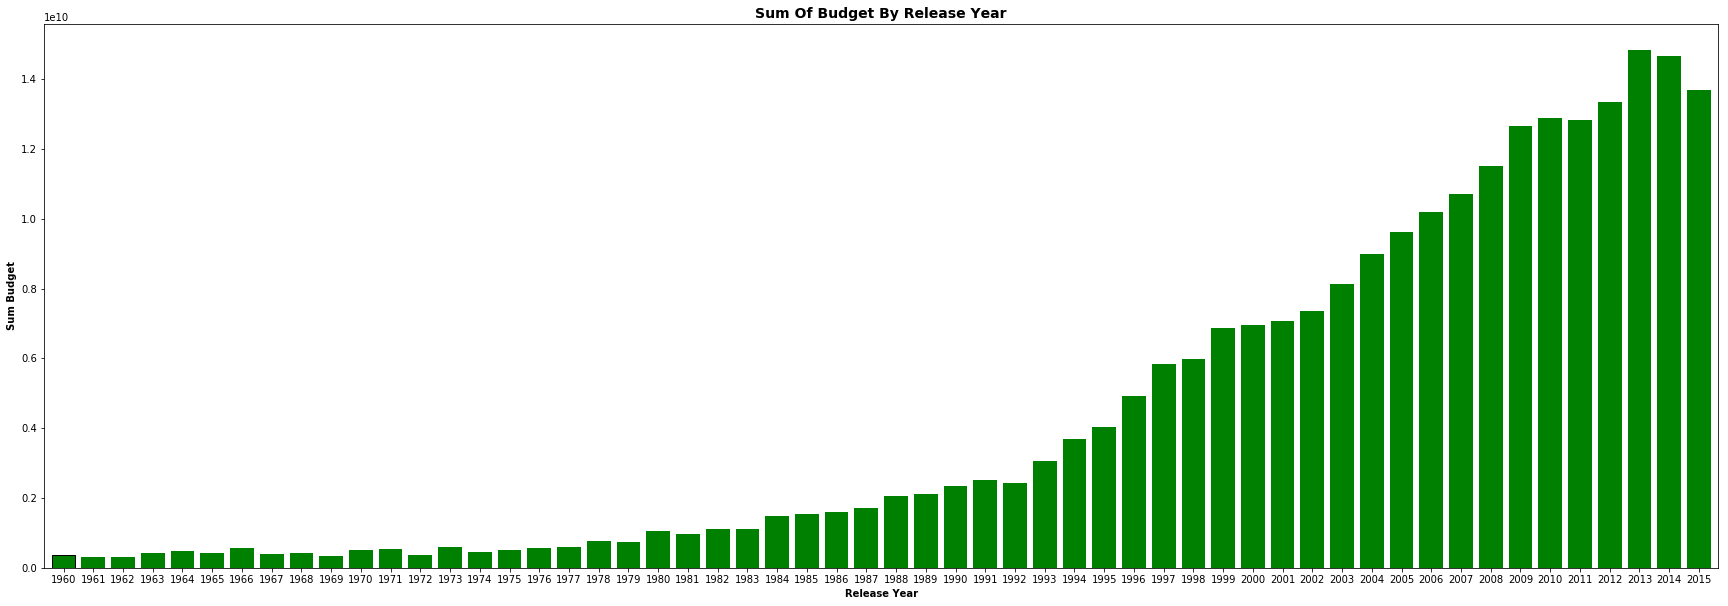

In [43]:
myGrpPlot(df, 'release_year', 'budget', color='green')

> ***Observation: From the graph, 2012 witness movies with highest production budget***

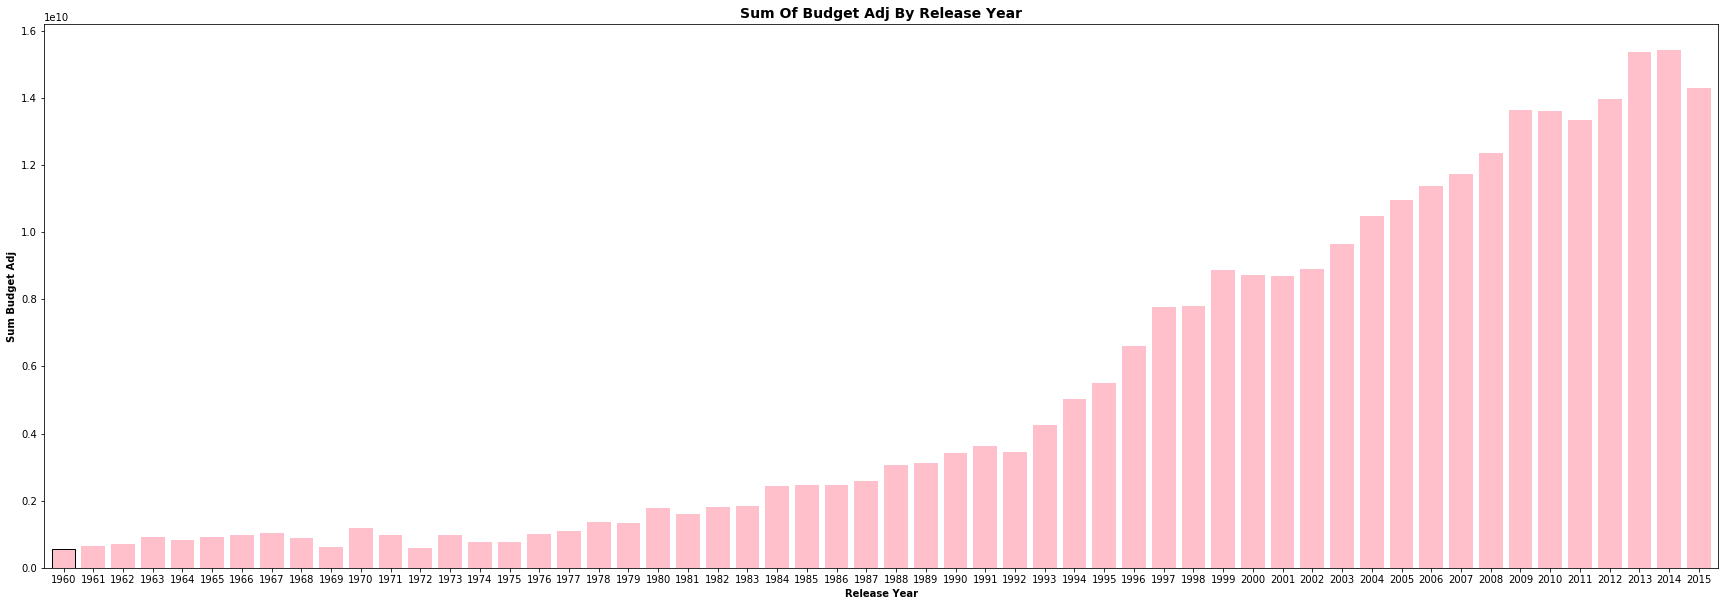

In [44]:
myGrpPlot(df, 'release_year', 'budget_adj', color='pink')

> ***Observation: From the graph, we can notice a contrast to the previous graph on budget. We can see that same of amount was expended on production budget in 2013 and 2014***

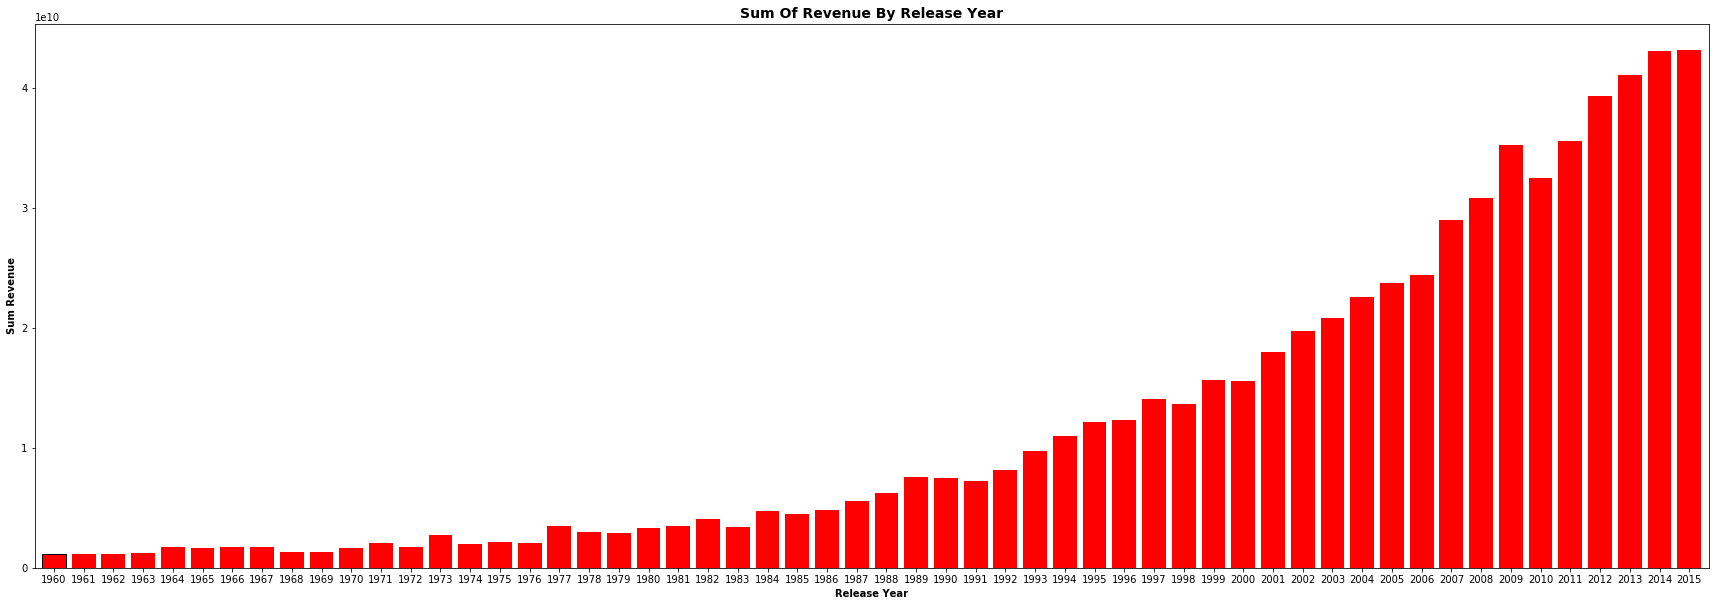

In [45]:
myGrpPlot(df, 'release_year', 'revenue', color ='red')

> ***Observation: From this graph, it can be observed that 2014 and 2015 has the highest revenue***

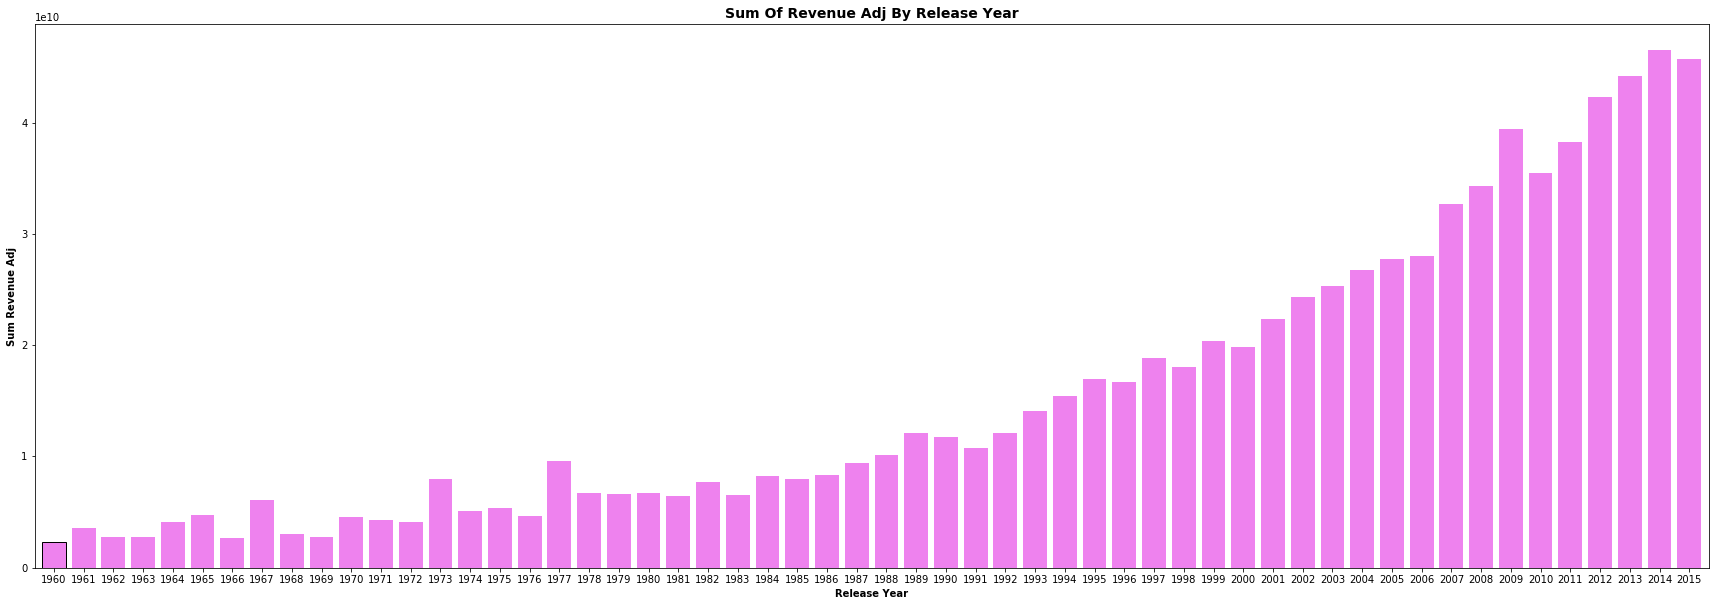

In [46]:
myGrpPlot(df, 'release_year', 'revenue_adj', color='violet')

> ***Observation: From the graph, you can notice a sharp contrast to the previous graph with the years witnessing an upward movement in their revenue and unlike the previous graph where 2014 and 2015 had the highest revenue, only 2014 had the highest revenue here***

In [75]:
# Defining a function to plot solutions to the questions asked 

# credits to the code goes to the reviewer of my first assignment

def myHBarPlot(df,grpVar,yVar,stat='mean',figsize=[15,15],color='blue'):
    
    # plot function
    
    df.groupby([grpVar])[yVar].agg(stat).plot.barh(edgecolor='black',figsize=figsize,rot=0,width=0.8,color=color);
    
    # tidy up labels after plottting
    
    grpVar=grpVar.replace("_"," ") #replace _ with space
    yVar=yVar.replace("_"," ") #replace _ with space
    
    # adding title to the plot
    
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(), fontsize = 14, weight = "bold")
    
    # adding y-label to the plot 
    
    plt.ylabel(grpVar.title(), fontsize = 10, weight = "bold")
    
    # adding x-label to the plot
    
    plt.xlabel(f'{stat} {yVar}'.title(), fontsize = 10, weight = "bold" )

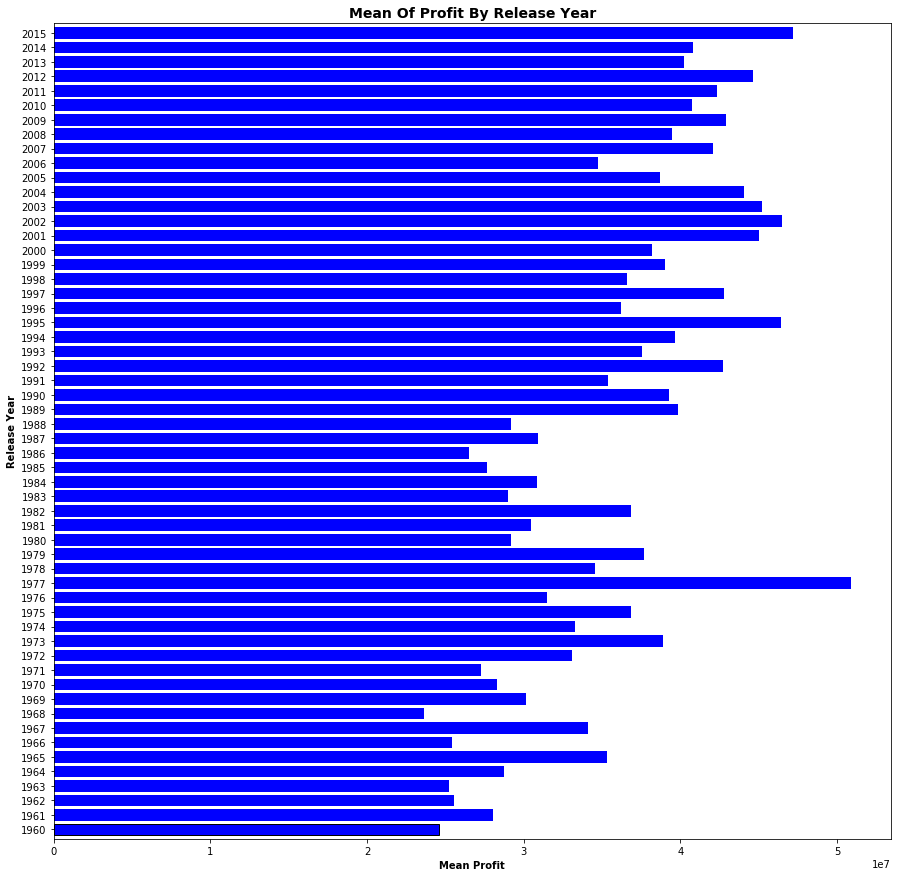

In [76]:
myHBarPlot(df, 'release_year', 'profit')

***From this graph, 1977 has the highest average profit per movie if inflation adjusted is not considered. This is in sharp contrast to the total sum of profits made on movies released per year where 2015 had the highest profit***

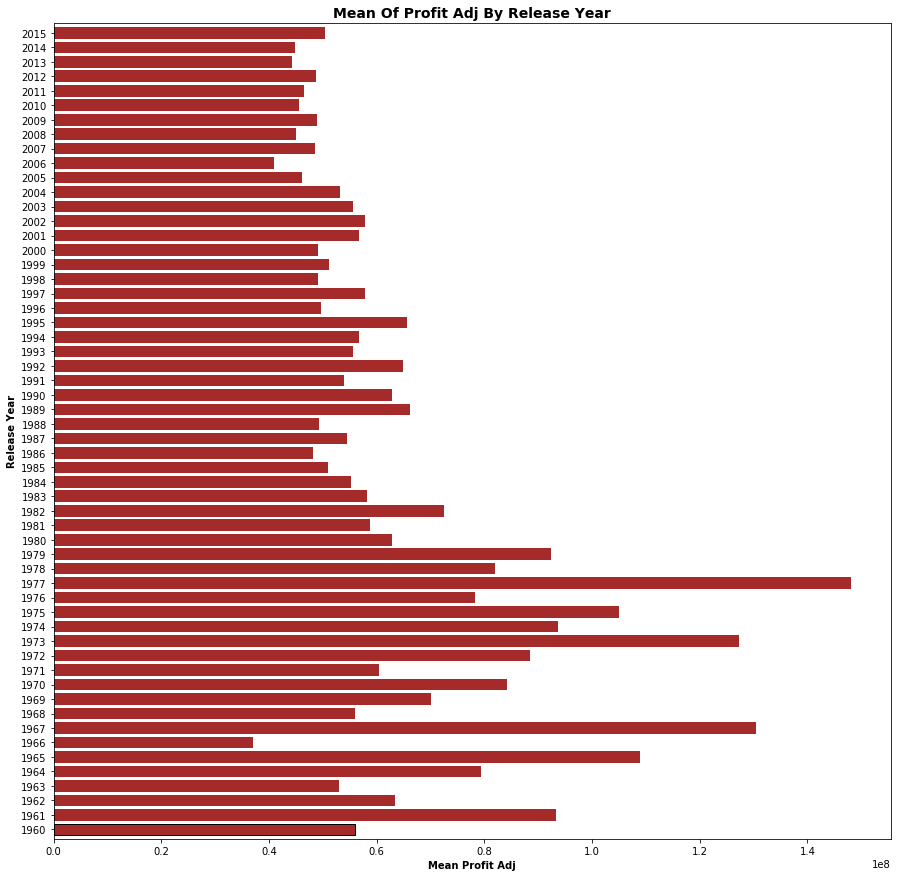

In [77]:
myHBarPlot(df, 'release_year', 'profit_adj', color='brown')

***From this graph, an observation that can be noticed is that 1977 return as the year with the highest average profit per movie when inflation adjustment is considered. This is also a sharp contrast to the the total sum plot that showed 2015 as the year with most profit for movies released***

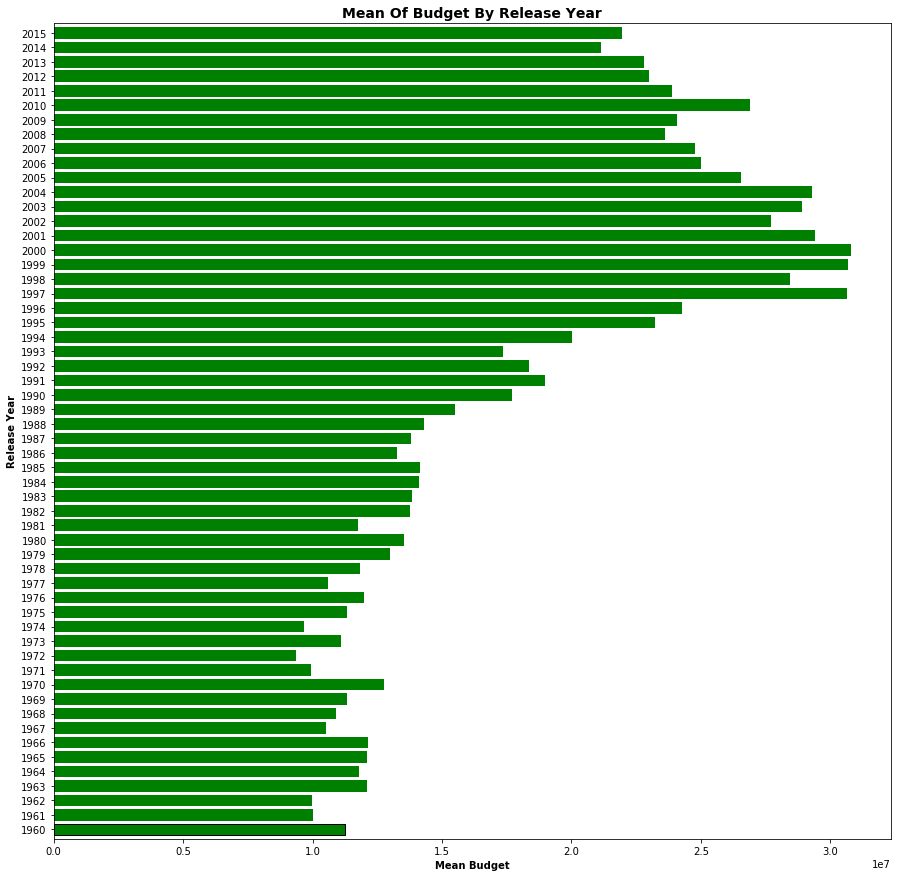

In [78]:
myHBarPlot(df, 'release_year', 'budget', color='green')

***From this plot, it can be observed that the highest average production budget per movie was spent in 2000 when inflation adjustment is not considered. This is a sharp contrast to the total production budget for all movies released per year that saw 2012 with the highest total production budget***

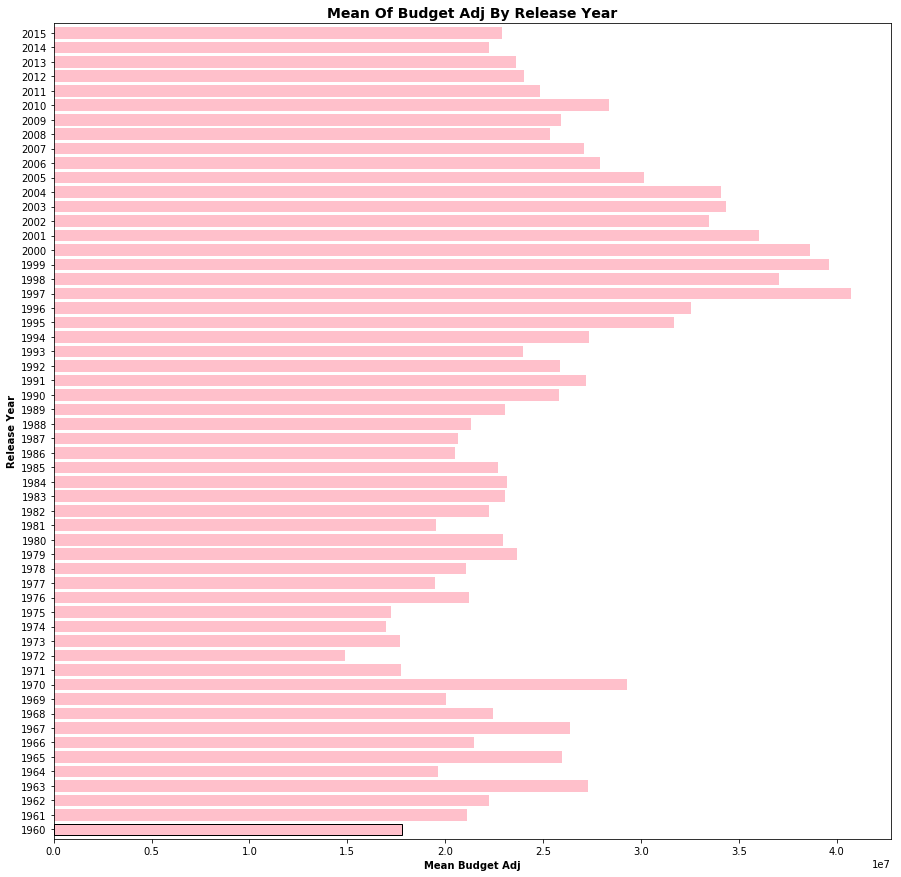

In [79]:
myHBarPlot(df, 'release_year', 'budget_adj', color='pink')

***From this plot, we can see that 1997 has the highest average production budget per movies released unlike in the plot of total production budget which saw 2013 and 2014 having the joint highest production budget for all movies released.***

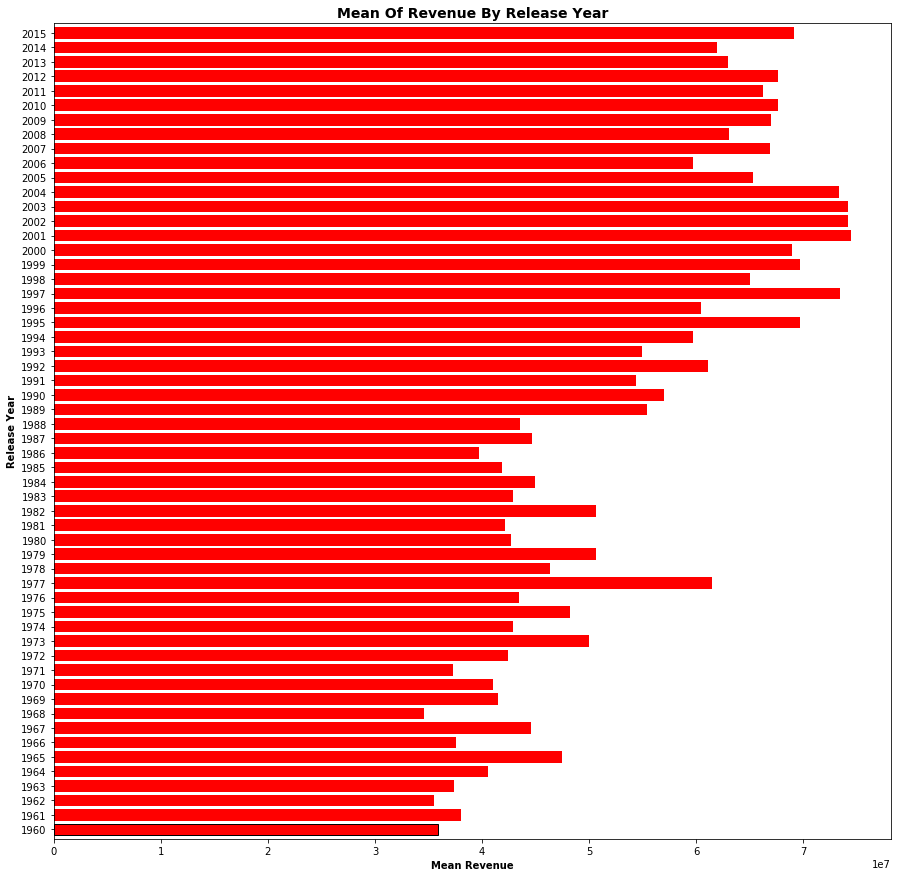

In [80]:
myHBarPlot(df, 'release_year', 'revenue', color='red')

***From the plot, it can be seen that 2001 saw the highest average revenue per movie released in each year. This is in contrast to the total revenue for movies released in each year which saw 2014 and 2015 with the highest revenue***

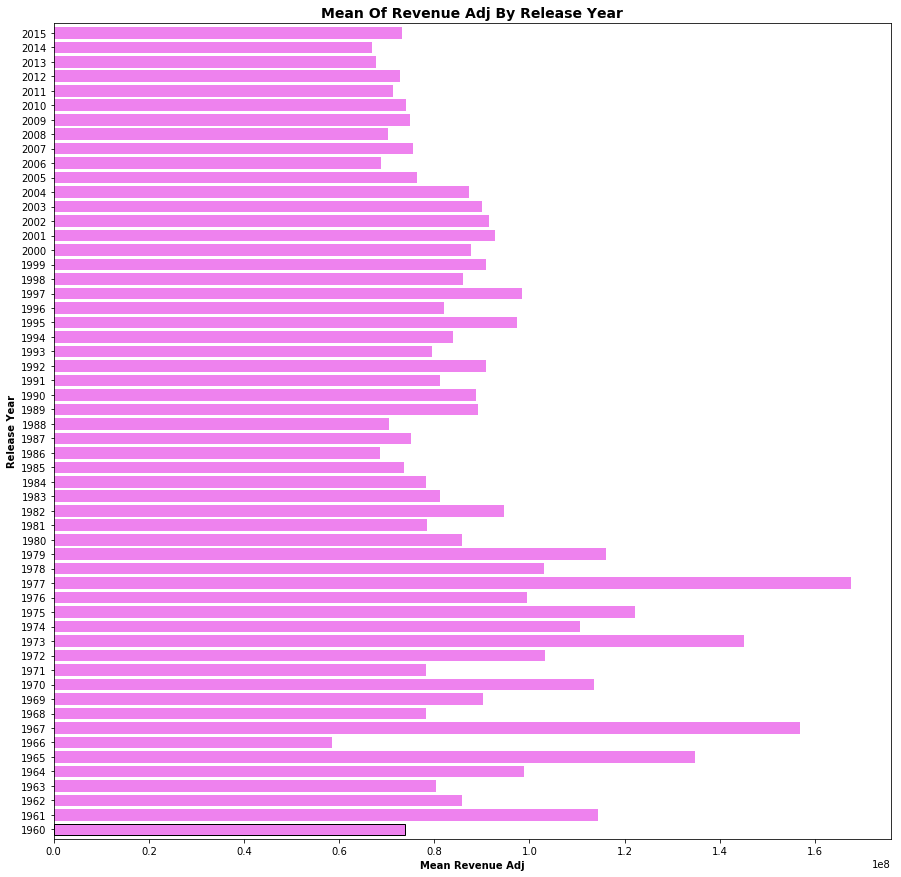

In [81]:
myHBarPlot(df, 'release_year', 'revenue_adj', color='violet')

***From this plot, it can be observed that 1977 has the highest average revenue per movie released each year if inflation adjustment is considered. This is also in sharp contrast with total revenue for movies released in each year when inflation adjustment is considered which saw 2014 with the highest figure***

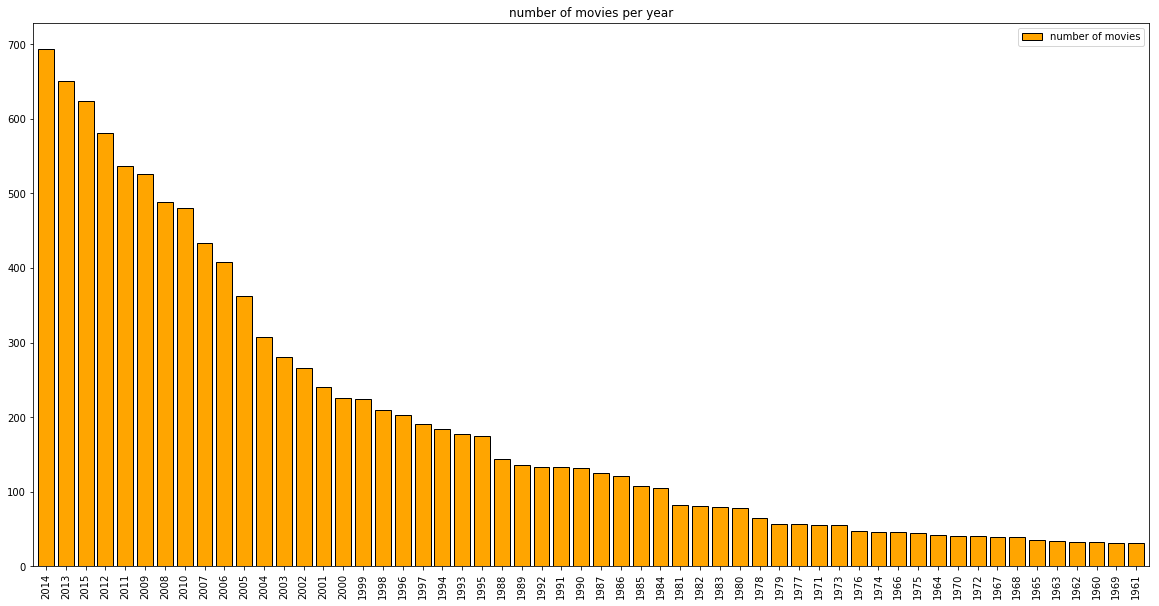

In [87]:
df.release_year.value_counts().plot(kind='bar', edgecolor='black', alpha=1.0, color='orange', label='number of movies', width=0.8,sort_columns=True, title='number of movies per year', figsize=(20,10))
plt.legend();

> ***Observation: From the graph, it can be seen tha 2014 has the highest number of movies released while 1961 and 1969 has the joint lowest number of movies***

<a id='conclusions'></a>
## Conclusions

> ***From the answers to the research questions, three major observations were:***

> ***1) Inflation has huge impact on the budget,revenue and profit of each movie***

> ***2) There is little or no correlation between the revenue made from a movie and its popularity among viewers. This is surprising as it was expected that the higher the revenue a movie makes, the more popular the movie should be among the viewers.***

> ***3) The number of movies released in a year has little impact on the gross revenue earned from the movies and also the profitablity***


> ***The limitation encountered is that the most movies have more than one genre in the genre columns. This made it difficult to measure the following:***

> ***1) it was difficult to measure how popular each genre is, among viewers***

> ***2) it was difficult to measure which genre is most profitable***

> ***3) it was difficult to measure which genre incurred more expenses in production***

> ***4) it was difficult to measure which genre earned more revenue***


> ***Further research work should be done on the following:***

> ***1) Which production company spent the most on producing movies?***

> ***2) Which director's movies are more popular among the viewers?***

> ***3) which actor's movies are more popular among the viewers?***


In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0